# Introduction
This notebook aims to perform comprehensive **user profiling** based on basic attributes, behavioral logs, and temporal patterns. The final goal is to identify distinct user segments for supporting targeted strategies such as recommendation system optimization and personalized marketing.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df_info = pd.read_csv('/content/drive/MyDrive/Projects/user_info.csv')
df_info.info()
df_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
 3   city       424170 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 12.9+ MB


,user_id,age_range,gender
count,424170.000000,421953.000000,417734.000000
mean,212085.500000,2.930262,0.341179
std,122447.476178,1.942978,0.524112
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


In [4]:
df_info.head()

,user_id,age_range,gender,city
0,376517,6.0,1.0,Florida/Miami
1,234512,5.0,0.0,New York/New York
2,344532,5.0,0.0,Nevada/Las Vegas
3,186135,5.0,0.0,Colorado/Denver
4,30230,5.0,0.0,South Carolina/Columbia


In [5]:
# Check missing values in user info
print("Missing values in user_info:")
print(df_info.isnull().sum())

Missing values in user_info:
user_id         0
age_range    2217
gender       6436
city            0
dtype: int64


In [6]:
# Fill missing values in user_info
df_info['age_range'] = df_info['age_range'].fillna(0)
df_info['gender'] = df_info['gender'].fillna(2)

# Confirm again
print("Missing values after cleaning:")
print(df_info.isnull().sum())

Missing values after cleaning:
user_id      0
age_range    0
gender       0
city         0
dtype: int64


In [7]:
df_bh = pd.read_csv('/content/drive/MyDrive/Projects/user_behavior_log_info.csv')
df_bh.info()
df_bh.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10985066 entries, 0 to 10985065
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   author_id    int64  
 3   year         int64  
 4   time_stamp   int64  
 5   action_type  object 
 6   timestamp    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 586.7+ MB


,user_id,item_id,author_id,year,time_stamp,timestamp
count,1.098507e+07,1.098507e+07,1.098507e+07,10985066.0,1.098507e+07,1.098507e+07
mean,2.121561e+05,5.538984e+05,2.470654e+03,2024.0,9.230725e+02,5.726896e+04
std,1.222877e+05,3.221662e+05,1.473131e+03,0.0,1.954358e+02,1.994203e+04
min,1.000000e+00,2.000000e+00,1.000000e+00,2024.0,5.110000e+02,1.078740e-01
25%,1.063340e+05,2.731900e+05,1.151000e+03,2024.0,7.300000e+02,4.404090e+04
50%,2.126540e+05,5.555380e+05,2.459000e+03,2024.0,1.010000e+03,6.046427e+04
75%,3.177490e+05,8.306890e+05,3.760000e+03,2024.0,1.109000e+03,7.359648e+04
max,4.241700e+05,1.113166e+06,4.995000e+03,2024.0,1.112000e+03,8.639999e+04


In [8]:
df_bh.head()

,user_id,item_id,author_id,year,time_stamp,action_type,timestamp
0,328862,323294,2882,2024,829,click,62242.300959
1,328862,623866,2882,2024,829,click,75598.841378
2,328862,239288,420,2024,801,click,69606.479645
3,328862,197239,420,2024,801,click,62758.912202
4,328862,524981,2382,2024,602,click,39651.123222


In [9]:
print("Missing values in behavior_log_info:")
print(df_bh.isnull().sum())

Missing values in behavior_log_info:
user_id        0
item_id        0
author_id      0
year           0
time_stamp     0
action_type    0
timestamp      0
dtype: int64


# 1. User Basic Profile Analysis

# 1.1 Gender Distribution

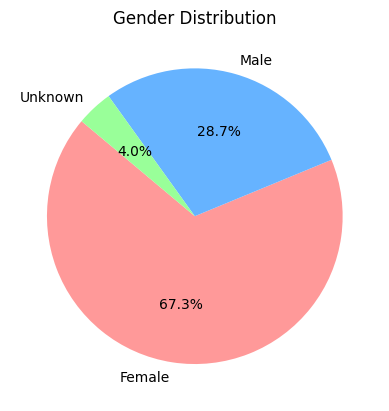

In [10]:
gender_map = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df_info['gender_label'] = df_info['gender'].map(gender_map)

gender_counts = df_info['gender_label'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, title='Gender Distribution')
plt.ylabel('')
plt.show()

## 1.2 Age Group Distribution

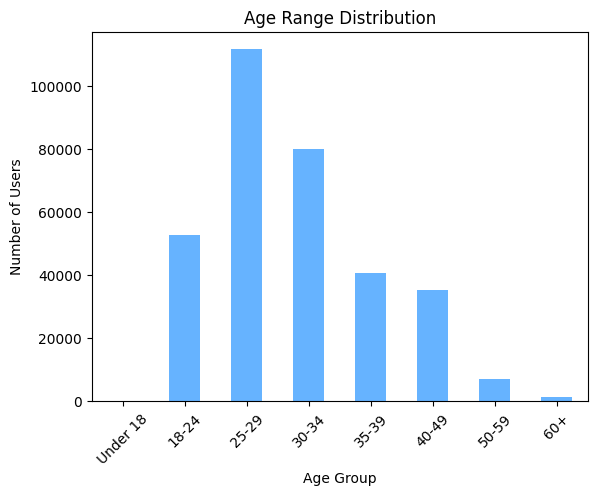

In [11]:
age_map = {
    1: 'Under 18',
    2: '18-24',
    3: '25-29',
    4: '30-34',
    5: '35-39',
    6: '40-49',
    7: '50-59',
    8: '60+'
}
df_info['age_label'] = df_info['age_range'].map(age_map)
age_order = ['Under 18', '18-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60+']
df_info['age_label'] = pd.Categorical(df_info['age_label'], categories=age_order, ordered=True)

df_info['age_label'].value_counts().sort_index().plot(
    kind='bar',
    color='#66b3ff',
    title='Age Range Distribution'
)
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

## 1.3 Top 10 Cities Distribution

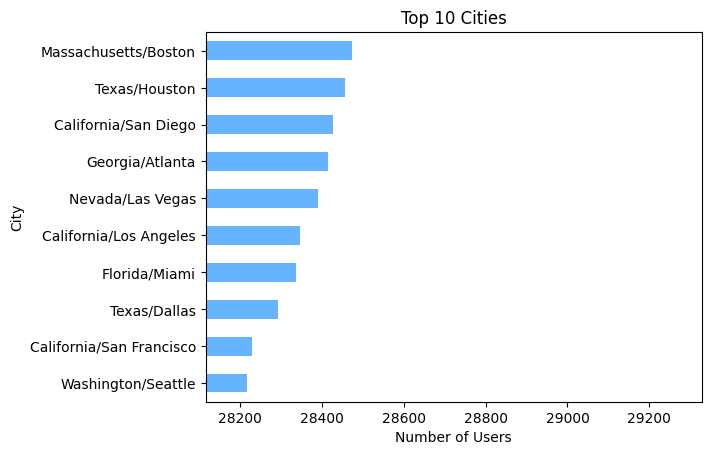

In [12]:
top_cities = df_info['city'].value_counts().head(10)
min_val = top_cities.min() - 100
max_val = top_cities.max() * 1.03

ax = top_cities.plot(kind='barh', title='Top 10 Cities', color='#66b3ff')
plt.xlabel('Number of Users')
plt.xlim(min_val, max_val)
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.show()

# 2. User Behavior Overview


# 2.1 Action Type Distribution

Unique action types: ['click' 'read' 'like' 'fav']


/tmp/ipython-input-1017447553.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='pastel')


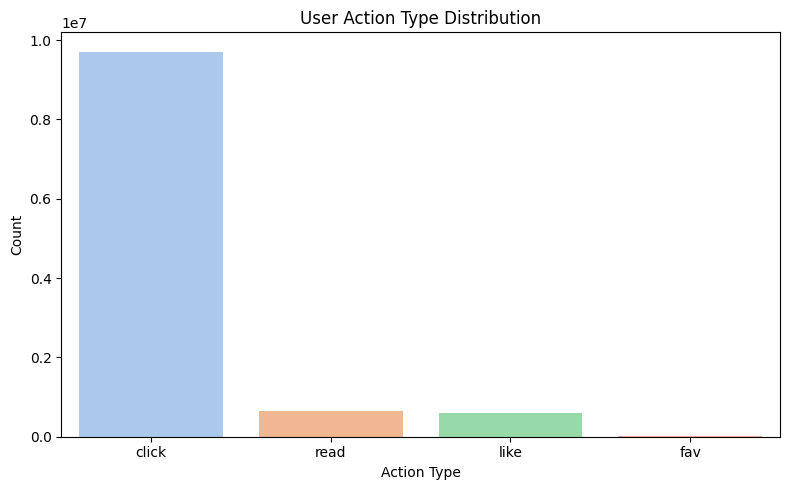

In [13]:
# Count the number of each action type
action_counts = df_bh['action_type'].value_counts()

# Print unique action types
print("Unique action types:", df_bh['action_type'].unique())

# Plot the distribution of action types
plt.figure(figsize=(8, 5))
sns.barplot(x=action_counts.index, y=action_counts.values, palette='pastel')
plt.title('User Action Type Distribution')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2.2 Top 10 Most Active Users

Average actions per user: 25.91557024528226
Top 10 most active users:
user_id
254263    2894
276887    2371
109251    1834
23106     1674
179074    1633
112081    1454
421796    1316
131476    1304
64659     1226
269579    1209
Name: count, dtype: int64


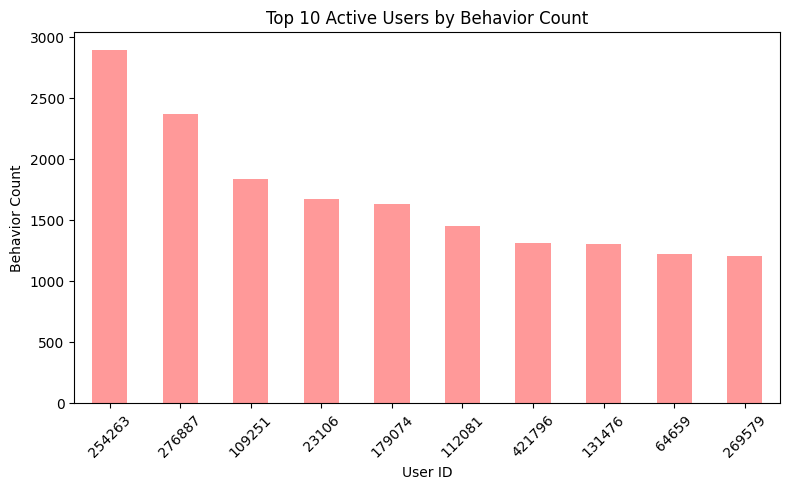

In [14]:
# Count total behavior actions per user
user_action_counts = df_bh['user_id'].value_counts()

# Display basic statistics of user activity
print("Average actions per user:", user_action_counts.mean())
print("Top 10 most active users:")
print(user_action_counts.head(10))

# Plot the top 10 most active users
top_10_users = user_action_counts.head(10)

plt.figure(figsize=(8, 5))
top_10_users.plot(kind='bar', color='#ff9999', title='Top 10 Active Users by Behavior Count')
plt.xlabel('User ID')
plt.ylabel('Behavior Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.3 Top 10 Most Popular Items

/tmp/ipython-input-4157599781.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items['count'], y=top_items_sorted['item_id'], palette='Set2')


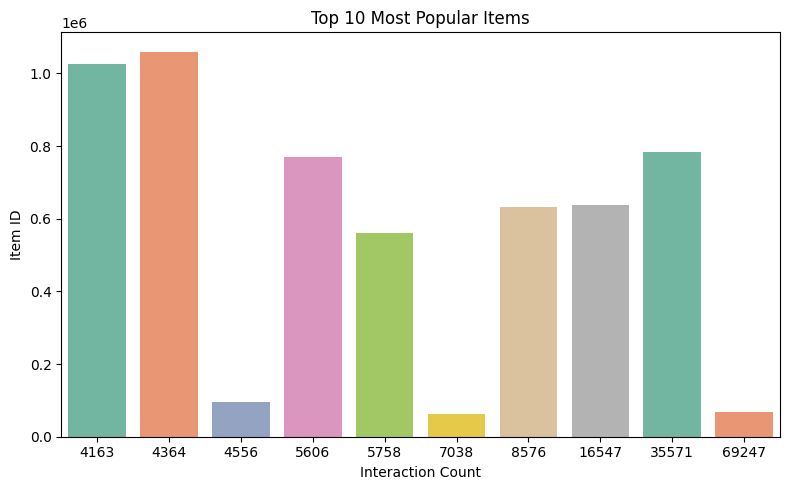

In [15]:
# Count how many times each item_id appeared in behavior log
item_freq_all = df_bh['item_id'].value_counts().reset_index()
item_freq_all.columns = ['item_id', 'count']

top_items = item_freq_all.head(10)
top_items_sorted = top_items.sort_values(by='count', ascending=True)


plt.figure(figsize=(8, 5))
sns.barplot(x=top_items['count'], y=top_items_sorted['item_id'], palette='Set2')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Interaction Count')
plt.ylabel('Item ID')
plt.tight_layout()
plt.show()

# 3.0 Behavior Preference by Demographics

## 3.1 Behavior Type by Gender

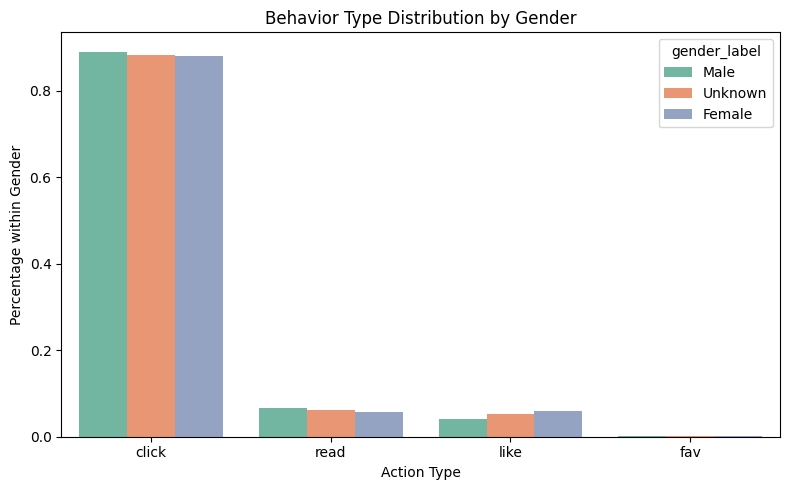

In [16]:
# Merge user_info with behavior log
df_merged_gender = pd.merge(df_bh, df_info[['user_id', 'gender']], on='user_id', how='left')

# Map gender to label
gender_map = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df_merged_gender['gender_label'] = df_merged_gender['gender'].map(gender_map)

# Count behavior frequency by gender and action type
action_by_gender = df_merged_gender.groupby(['gender_label', 'action_type']).size().reset_index(name='count')

# Calculate percentage within each gender
action_by_gender['percentage'] = action_by_gender['count'] / action_by_gender.groupby('gender_label')['count'].transform('sum')

# Sort by percentage
action_by_gender_sorted = action_by_gender.sort_values(by='percentage', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=action_by_gender_sorted,
    x='action_type',
    y='percentage',
    hue='gender_label',
    palette='Set2'
)

plt.title('Behavior Type Distribution by Gender')
plt.ylabel('Percentage within Gender')
plt.xlabel('Action Type')
plt.tight_layout()
plt.show()

## 3.2 Behavior Type by Age Group

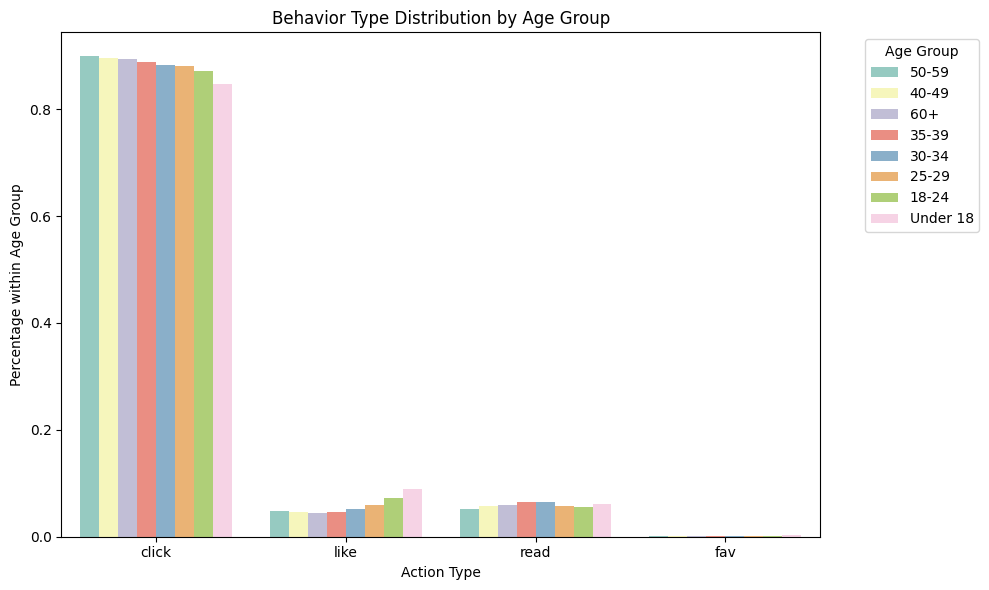

In [17]:
# Merge age_range into behavior log
df_merged_age = pd.merge(df_bh, df_info[['user_id', 'age_range']], on='user_id', how='left')
df_merged_age['age_label'] = df_merged_age['age_range'].map(age_map)

# Count number of actions per age group and action type
action_by_age = df_merged_age.groupby(['age_label', 'action_type']).size().reset_index(name='count')

# Calculate percentage within each age group
action_by_age['percentage'] = action_by_age['count'] / action_by_age.groupby('age_label')['count'].transform('sum')

# Sort by percentage for better visual comparison
action_by_age_sorted = action_by_age.sort_values(by='percentage', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=action_by_age_sorted,
    x='action_type',
    y='percentage',
    hue='age_label',
    palette='Set3'
)

plt.title('Behavior Type Distribution by Age Group')
plt.ylabel('Percentage within Age Group')
plt.xlabel('Action Type')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 3.3 Age Distribution within Each Behavior

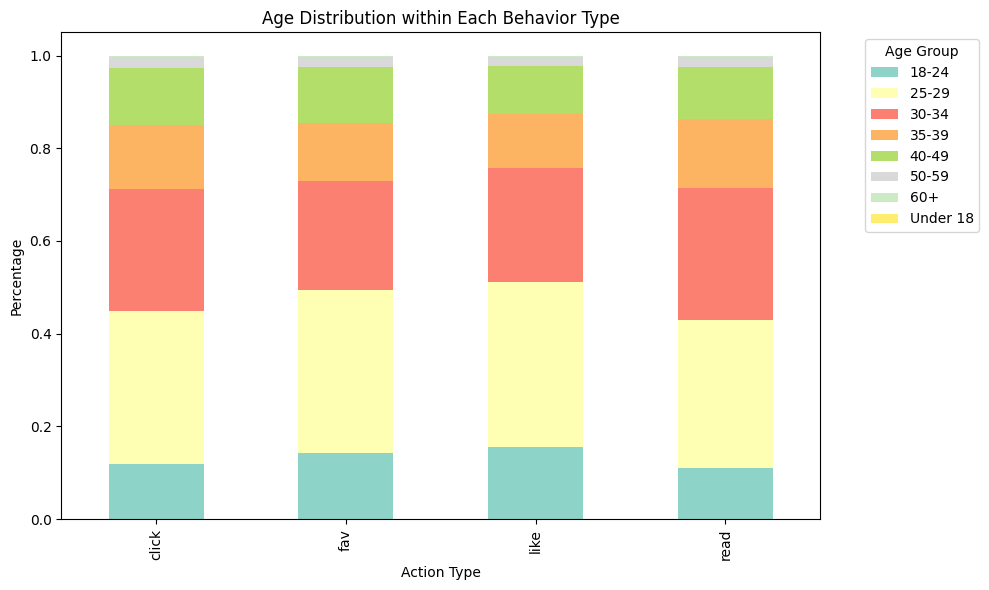

In [18]:
# Count: for each action_type, how many from each age group
action_age_dist = df_merged_age.groupby(['action_type', 'age_label']).size().reset_index(name='count')

# Normalize by action_type (make percentages within each behavior)
action_age_dist['percentage'] = action_age_dist['count'] / action_age_dist.groupby('action_type')['count'].transform('sum')

# Pivot table for stacked bar chart
pivot_table = action_age_dist.pivot(index='action_type', columns='age_label', values='percentage').fillna(0)

# Plot stacked bar chart
pivot_table.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set3',
    title='Age Distribution within Each Behavior Type'
)

plt.ylabel('Percentage')
plt.xlabel('Action Type')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 4.0 Temporal Behavior Analysis

## 4.1 Hourly Activity

/tmp/ipython-input-2853972315.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='Blues')


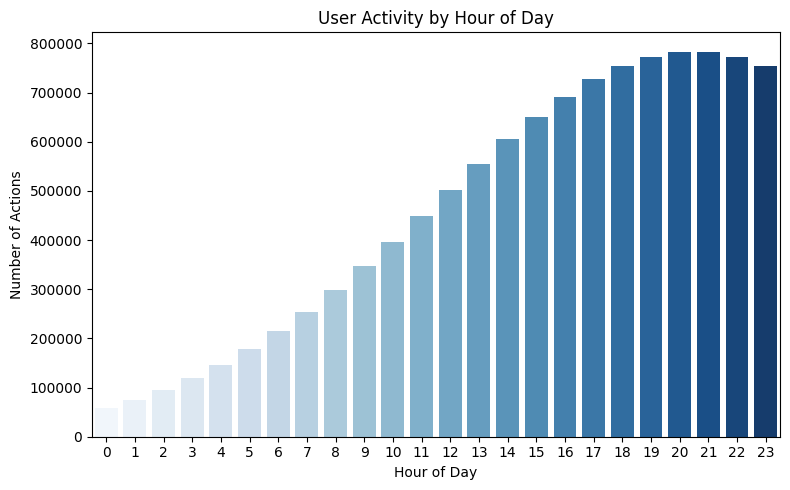

In [19]:
# Convert timestamp (seconds) to hour (0~23)
df_bh['hour'] = (df_bh['timestamp'] // 3600).astype(int)

# Count number of actions per hour
hour_counts = df_bh['hour'].value_counts().sort_index()

# Plot hourly activity
plt.figure(figsize=(8, 5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='Blues')
plt.title('User Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Actions')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

## 4.2 Time Period Activity

/tmp/ipython-input-1448213115.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_period_counts.index, y=time_period_counts.values, palette='Set2')


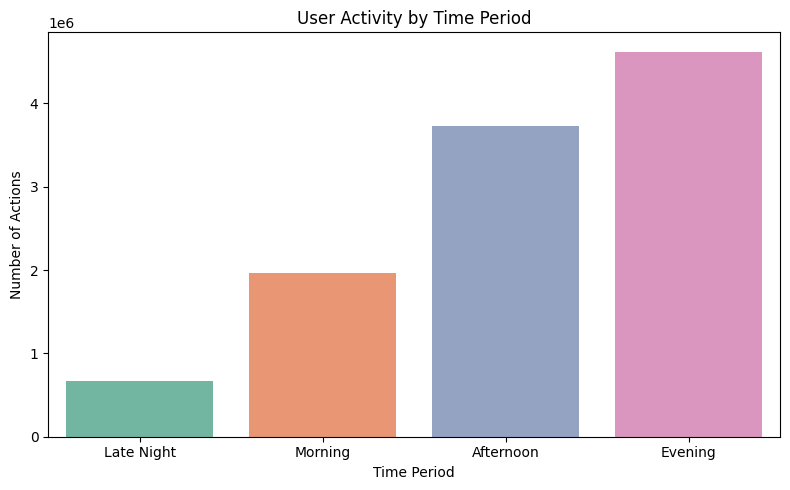

In [20]:
# Define time bins and labels
bins = [0, 6, 12, 18, 24]  # hour boundaries
labels = ['Late Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column indicating the time period
df_bh['time_period'] = pd.cut(df_bh['hour'], bins=bins, labels=labels, right=False)

# Count actions per time period
time_period_counts = df_bh['time_period'].value_counts().reindex(labels)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=time_period_counts.index, y=time_period_counts.values, palette='Set2')
plt.title('User Activity by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Actions')
plt.tight_layout()
plt.show()

## 4.3 Time Period by Behavior





/tmp/ipython-input-1611941591.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  action_time = df_bh.groupby(['action_type', 'time_period']).size().reset_index(name='count')


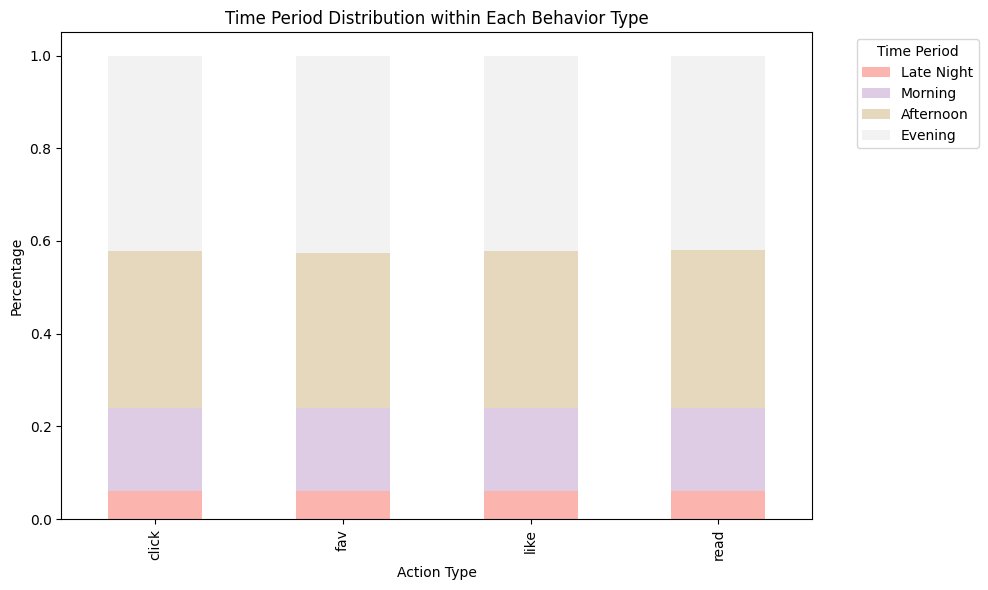

In [21]:
# Count number of actions for each time period and action type
action_time = df_bh.groupby(['action_type', 'time_period']).size().reset_index(name='count')

# Calculate percentage within each action_type
action_time['percentage'] = action_time['count'] / action_time.groupby('action_type')['count'].transform('sum')

# Pivot table for stacked bar chart
pivot_time = action_time.pivot(index='action_type', columns='time_period', values='percentage').fillna(0)

# Plot
pivot_time.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Pastel1',
    title='Time Period Distribution within Each Behavior Type'
)

plt.ylabel('Percentage')
plt.xlabel('Action Type')
plt.legend(title='Time Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 5. User Segmentation

## 5.1 Activity-Based Segmentation

/tmp/ipython-input-887796082.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts.index, y=level_counts.values, palette='coolwarm')


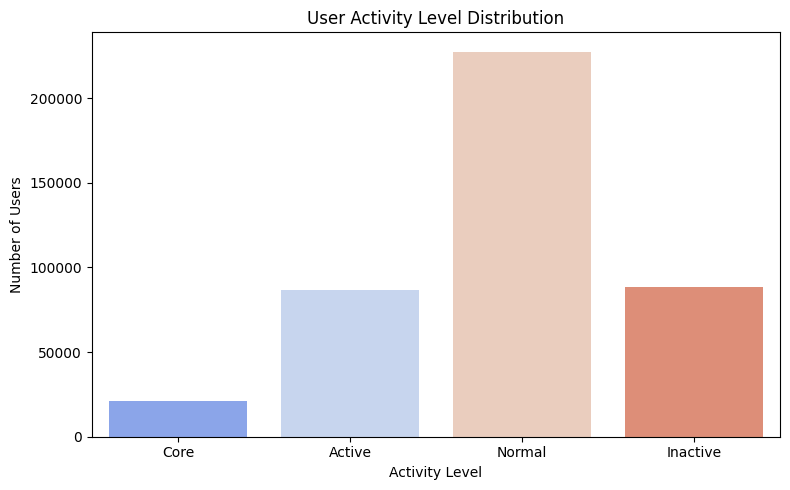

In [22]:
# Count total behavior per user
user_activity = df_bh['user_id'].value_counts().reset_index()
user_activity.columns = ['user_id', 'action_count']

# Calculate quantiles
q25 = user_activity['action_count'].quantile(0.25)
q75 = user_activity['action_count'].quantile(0.75)
q95 = user_activity['action_count'].quantile(0.95)

# Define levels
def tag_activity_level(x):
    if x >= q95:
        return 'Core'
    elif x >= q75:
        return 'Active'
    elif x >= q25:
        return 'Normal'
    else:
        return 'Inactive'

user_activity['activity_level'] = user_activity['action_count'].apply(tag_activity_level)

# Count number of users per level
level_counts = user_activity['activity_level'].value_counts().reindex(['Core', 'Active', 'Normal', 'Inactive'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=level_counts.index, y=level_counts.values, palette='coolwarm')
plt.title('User Activity Level Distribution')
plt.xlabel('Activity Level')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


### 5.1.1 Gender Composition by Activity Level

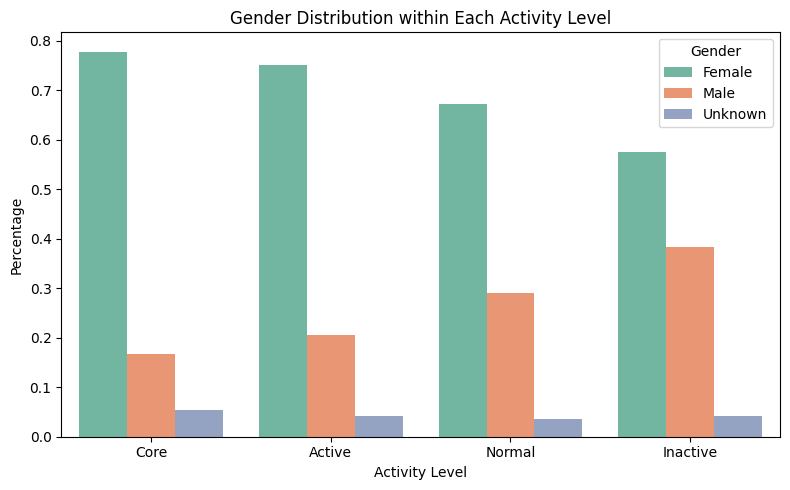

In [23]:
# Merge user activity level into user info
df_info_labeled = pd.merge(df_info, user_activity[['user_id', 'activity_level']], on='user_id', how='left')

# Map gender label
gender_map = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df_info_labeled['gender_label'] = df_info_labeled['gender'].map(gender_map)

# Count per level and gender
gender_dist = df_info_labeled.groupby(['activity_level', 'gender_label']).size().reset_index(name='count')

# Normalize by level to get percentage
gender_dist['percentage'] = gender_dist['count'] / gender_dist.groupby('activity_level')['count'].transform('sum')


# Optional sort order
order = ['Core', 'Active', 'Normal', 'Inactive']

plt.figure(figsize=(8, 5))
sns.barplot(
    data=gender_dist,
    x='activity_level',
    y='percentage',
    hue='gender_label',
    order=order,
    palette='Set2'
)
plt.title('Gender Distribution within Each Activity Level')
plt.ylabel('Percentage')
plt.xlabel('Activity Level')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


## 5.2 Behavior-Based Clustering (KMeans + PCA)

In [24]:
# Count how many times each user performed each type of behavior
user_behavior = df_bh.groupby(['user_id', 'action_type']).size().unstack(fill_value=0).reset_index()

features = user_behavior.drop('user_id', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
user_behavior['cluster'] = kmeans.fit_predict(X_scaled)

# Compute the average behavior count for each user cluster
cluster_summary = user_behavior.groupby('cluster')[['click', 'like', 'read', 'fav']].mean()
print(cluster_summary)

action_type      click      like      read       fav
cluster                                             
0            89.915214  7.732529  4.623741  0.001968
1            15.910681  0.772806  1.240855  0.000000
2            21.856634  0.847806  1.347763  1.291571


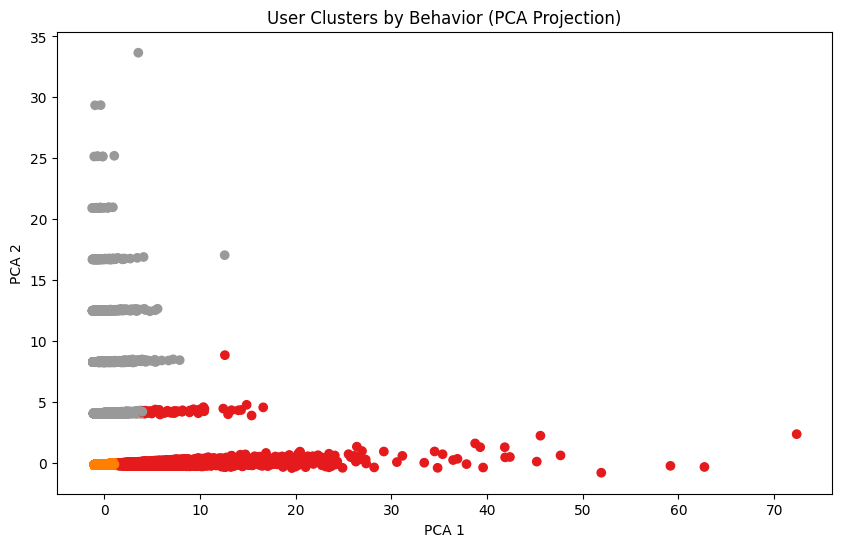

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=user_behavior['cluster'], cmap='Set1')
plt.title('User Clusters by Behavior (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
